<a href="https://colab.research.google.com/github/tlyonsWIT/Applied-Calculus/blob/main/Applied%20Calculus%202021%20-%20Python%20Workbook%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name:
### Student Number:

# Python Workbook 8 - Further Applications Integration

# Section 1:  Average Values of Functions

* In this work book we will use the integral to evaluate the average value of some function $f(x)$, over some interval $a\leq x\leq b$.


* Mathematically, we write this avarage as 
$$
\bar{f}=\frac{1}{b-a}\int_{a}^{b}f(x)dx.
$$


* In Python there are two ways of doing this, either __numerically__ or __symbolically__.


* For the time being we will concentrate on the symbolic evaluation of these averages.


* To begin, we import the __sympy__ library in the ususal way. We also use the __init_printing__ environment to produce mathematical output when we run Python cells.

In [1]:
from sympy import *
from sympy import init_printing 
init_printing()

## Example 1: 

Given the function
$$
f(t)=t^{3}-8t^{2}+t+75
$$
answer the following:


1. Plot the function f(t) over the interval $-5\leq t\leq 5$.


2. From the plot, determine if the function is __mostly positive__ or __mostly negative__.


3. Determine the average value of the function.


4. Does this agree with your observation in Part 2.

### Part 1:
First we must create a symbolic variable for $t$, and then define the function $f(t)$.

In [2]:
t=symbols('t')

In [3]:
f=t**3-8*t**2+t+75
f

Now we can plot the function $f(t)$ over the interval $-5\leq t\leq 5$.

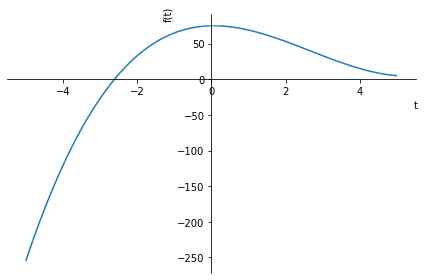

In [4]:
plot(f,(t,-5,5));

### Part 2:
From the graph it appears the function is __mostly potitive__, the function is positive over a much larger interval than negative.

### Part 3:
* We evaluate the average of the function as $\frac{1}{b-a}\int_{a}^{b}f(t)dt$, and with $a=-5$ and $b=5$, it follows that 


$$
\bar{f}=\frac{1}{5-(-5)}\int_{-5}^{5}f(t)dt=\frac{1}{10}\int_{-5}^{5}f(t)dt.
$$



In [5]:
a=-5
b=5
f_bar=(1/(b-a))*integrate(f,(t,a,b))
f_bar

### Part 4:

Since the function is mostly positive over the interval $-5\leq t\leq 5$, the average value of the function should be positive over this interval.

## Exercise 1 (from handout 3): 

The temperature $T$ (measureed in $^{\circ}$C) at time $t$ is given by
$$
T(t)=0.001t^{4}-0.28t^{2}+25
$$
where $t$ is the number of hours from __noon__.

Using this, answer the following:

1. Plot the function T(t) over the interval $0<t<12$, i.e. between noon and midnight.



2. From this plot, estimate if the temperature is mostly positive or mostly negative in this interval.



3. Find the average value of the temperature beteween noon and midnight.



4. Does this agree with your observation from Part 2.

## The Root Mean Square (RMS) of a function

* Given a function $f(t)$, the __RMS__ of this function, over the time interval $a<t<b$ is given by:
$$
RMS(f(t))=\sqrt{\frac{1}{b-a}\int f(t)^2dt}
$$

* This is an important type of average, especially in relation to electronics and elictrical supply.

## Example 2 - RMS of a sinusoid

Given by the function
$$
  g(t) = 400\sin(250\pi t),
$$
 
answer the following:
1. Plot this function of the time interval $0\leq t\leq 0.016$


2. Find the average value of this function over this time interval, as we did in __Exercise 1__.


3. Find the RMS of this over the time interval.


4. Confirm that this RMS is equivalent to $\frac{400}{\sqrt{2}}$

### Part 1:
Defining the function we have 

In [6]:
g=400*sin(250*pi*t)

* We can now plot the temperaature as a function of $t$, over the time interval $0<t<0.016$:

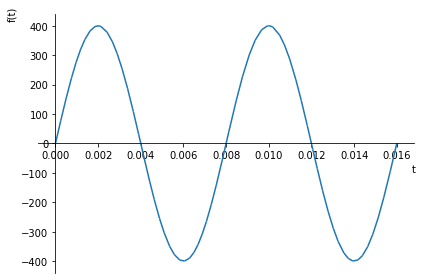

In [7]:
plot(g,(t,0,0.016));

* From the graph we see that function is negative just as often as it is positive, so we should expect its average to be zero.



* In other word, half of the area is above the $x$-axis and hald the area is below the $x$-axis.

### Part 2:

* Finding the average of the function over the time interval we have 

In [8]:
a=0
b=0.016
g_bar=1/(b-a)*integrate(g,(t,a,b))
g_bar

### Part 3

* We find the __RMS__ of the function as follows:

In [9]:
a=0
b=0.016
RMS_g=sqrt((1.0/(b-a))*integrate(g**2,(t,a,b)))
RMS_g

### Part 4

* Comparing with $\frac{400}{\sqrt{2}}$ we have

In [10]:
400/sqrt(2).evalf()

#### Reamark on $\text{RMS}(A\sin(kt))$


* When we take the __RMS__ of a function like $A\sin(kt)$ or $A\cos(kt)$, where $A$ and $k$ are conatants, we always end up with the answer $\frac{A}{\sqrt{2}}$.



* This is a general property of the trigonometric functions $\cos$ and $\sin$, and has nothing to do with the values of $A$ or $k$.

## Exercise 2

The electricity voltage delivered to a house in Ireland is given by the function
$$
    V(t) = 220\sin(50t)
$$

1. Plot the function $V(t)$ and from the graph estimate the __mean__ of this voltage over $0<t<\frac{\pi}{25}$.


2. Find the mean value of this voltage over the time interval given.


3. Find the RMS of this voltage of this voltage over the time given.


4. Confirm that this RMS is equal to $\frac{220}{\sqrt{2}}$.

# Section 2: Numerical Integration - The Trapezoidal Rule

* The integral of a function $f(x)$, over the interval $a\leq x\leq b$, according to the __trapezoidal rule__ is given by


$$
\int_{a}^{b}f(x)dx= \frac{h}{2}[y_0+y_n+2(y_1+y_2+y_3+\ldots+y_{n-1})]
$$


* Here the parameters are given by

__$n$__ The number of steps in the integration.



__$h$__ The stepsize of the integration, given by $h=\frac{b-a}{n}$


__$y_n$__ The value of the function at $x_n=x_0+nh$, i.e. $y_{n}=f(x_n)$ 

## Example 3

Integrate the following function, over the interval $0\leq x\leq 5$, using the trapezoidal rule with $n=11$ evaluation points:

$$
    P(x) = 1+x^2.
$$


### Part 1:

* Define the function

In [11]:
def P(x):
    return 1+x**2

### Part 2:
* To integrate this function numerically, we need to import the __numpy__ library in the usual way:

In [13]:
import numpy as np
from numpy import cos, sin, exp, log, tan, pi
import matplotlib.pyplot as plt

* We have also imported several useful functions from the __numpy__ library.


* We import __matplotlib.pyplot__ to create plots of what we are doing along the way.

### Import __trapz__ from numpy

* We can use the __trapz__ function from the __numpy__ library to calculate integrals using the trapezoidal rule automaically!!

In [14]:
from numpy import trapz # No need to import again once this cell has been run once!!

### Create the $x$-space for the integral

* Since we are integrating along $0\leq x\leq 4$ using $n=5$ points, we create the following __linspace__ for the integral:

In [15]:
X=np.linspace(0,4,5)
X

array([0., 1., 2., 3., 4.])

### Evaluating the functions on the __linspace__

* The function evaluated on this __linspace__ is given by

In [16]:
P(X)

array([ 1.,  2.,  5., 10., 17.])

* This returns the square of each value in the __linspace  X__


* We plot these values as follows

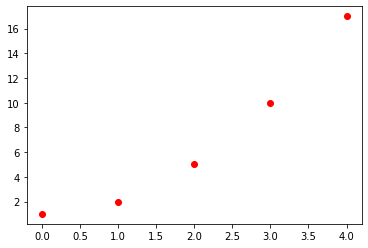

In [17]:
plt.plot(X,P(X),'o',color='red')

* We use __'o'__ in the plot function to indicate we want to use closed dots to represent the data values.



* Other markers include __'+'__, __'v'__, __'s'__, __'d'__ among many others. 

## Integrating on the linspace

* We can integrate this using the trapezoidal rule as follows:

In [18]:
trapz(P(X),X)

* This gives 2 times each value $X_1$, $X_2$ and $X_3$, while it gives only 1 times the values $X_{0}$ and $X_{4}$. This sum is then mutiplied by  half the stepsize.


* In the figure below we illustrate what we have done graphically:

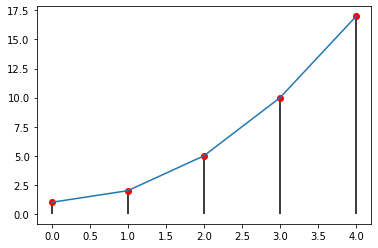

In [19]:
plt.plot(X,P(X),'o',color='red')
plt.vlines(X,ymin=0,ymax=P(X))
plt.plot(X,P(X))

* What we are doing numerically is calculating the areas of each of the trapezoids shown above.



* The __First Trapezoid__ has heights __P(0)__, __P(1)__ and width __h__ so 

$$
\mathrm{Area}_1=h\cdot\frac{P(0)+P(1)}{2}.
$$


* The __Second Trapezoid__ has heights __P(1)__, __P(X[2])__ and width __h__ so 
$$
\mathrm{Area}_2=h\cdot\frac{P(X[1])+P(X[2])}{2}.
$$


* The __Third Trapezoid__ has heights __P(X[2])__, __P(X[3])__ and width __h__ so 
$$
\mathrm{Area}_3=h\cdot\frac{P(X[2])+P(X[3])}{2}.
$$


* The __Fourth Trapezoid__ has heights __P(X[3])__, __P(X[4])__ and width __h__ so 
$$
\mathrm{Area}_4=h\cdot\frac{P(X[3])+P(X[4])}{2}.
$$


* Hence the __total area__ is just the sum of these areas, given by
$$
\begin{aligned}
\mathrm{Area}&=\frac{h}{2}\left[P(X[0])+2P(X[1])+2P(X[2])+2P(X[3])+P(X[4])\right]\\
             &=\frac{h}{2}\left[2\{P(X[0])+P(X[1])+P(X[2])+P(X[3])+P(X[3])+P(X[4])\}-P(X[0])-P(X[4])\right]\\
             &=\frac{h}{2}\left[2\Sigma(P(X))-P(X[0])-P(X[4])\right].
\end{aligned}
$$


## Improving the answer

* The smaller we make the step size __h__, or equivalently, the larger we make **n**, then the better our answer will be.


* To see this, we evaluate the same integral using __n=51__ evaluation points:

In [64]:
X=np.linspace(0,4,51)

In [65]:
P(X)

array([ 1.    ,  1.0064,  1.0256,  1.0576,  1.1024,  1.16  ,  1.2304,
        1.3136,  1.4096,  1.5184,  1.64  ,  1.7744,  1.9216,  2.0816,
        2.2544,  2.44  ,  2.6384,  2.8496,  3.0736,  3.3104,  3.56  ,
        3.8224,  4.0976,  4.3856,  4.6864,  5.    ,  5.3264,  5.6656,
        6.0176,  6.3824,  6.76  ,  7.1504,  7.5536,  7.9696,  8.3984,
        8.84  ,  9.2944,  9.7616, 10.2416, 10.7344, 11.24  , 11.7584,
       12.2896, 12.8336, 13.3904, 13.96  , 14.5424, 15.1376, 15.7456,
       16.3664, 17.    ])

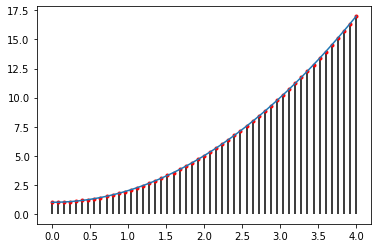

In [66]:
plt.plot(X,P(X),'.',color='red')
plt.vlines(X,ymin=0,ymax=P(X))
plt.plot(X,P(X))

* The trapesoidal rule gives the area above as follows:

In [23]:
trapz(P(X),X)

## The exact answer 

* Since the function is simple to integrate in this case, we can also get an exact answer symbolically.


* The exact answer we seek is:

In [24]:
x=symbols('x')
integrate(1+x**2,(x,0,4)).evalf()

* It is clear that with __n=51__ then the answer we get is fairly accurate.

* If we make __n__ even bigger then we will get an even more accuarte answer.

## Exercise 3

Integrate the following function, over the interval $0\leq x\leq 2\pi$, using the methods given below: 

$$
    Q(r) = \sin(r^2)
$$

1. Integrate using the trapezoidal rule with $n=15$.


2. Integrate using the trapezoidal rule with $n=75$.


3. Create __two__ plots to represent __both__ of these numerical integrals.

## Exercise 4

Integrate the following function, over the interval $0\leq r\leq 1.5$, using the methods given below: 

$$
    F(r) = \exp(-r^2).
$$

1. Integrate using the function __Trpz()__ with $n=51$.


2. Integrate using the function __Trpz()__ with $n=501$.


3. Create a plot to illustrate the trapezoidal sum in the case __n=51__ (like Example 3 and Exercise 3).

## Exercise 5

Integrate the following function, over the interval $0\leq r\leq 2\pi$, using the methods given below: 

$$
    G(r) = \exp(0.25\cos(r))
$$

1. Integrate using the function __Trpz()__ with $n=35$.


2. Integrate using the function __Trpz()__ with $n=201$.


3. Create a plot to illustrate the trapezoidal sum in the case $n=35$.